In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pylab as pl

In [2]:
dataset = pd.read_csv('data/twitter_dataset.csv', encoding = 'latin-1')
dataset.head()

,name_wt,statuses_count,followers_count,friends_count,favourites_count,listed_count,label
0,0.600000,195,19,53,58,0,0
1,0.705882,9,67,555,2,1,0
2,0.916667,20,21,267,0,0,1
3,0.500000,28,16,325,0,0,1
4,0.733333,45,20,515,0,0,1


In [3]:
#Creating dataset without labels
features=[]
for attributes in dataset.columns:
    if attributes != 'label':
        features.append(attributes)
features

['name_wt',
 'statuses_count',
 'followers_count',
 'friends_count',
 'favourites_count',
 'listed_count']

In [4]:
y = np.array(dataset['label'])
X = np.array(dataset.drop(columns='label').astype(float))

In [5]:
#normalizing the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

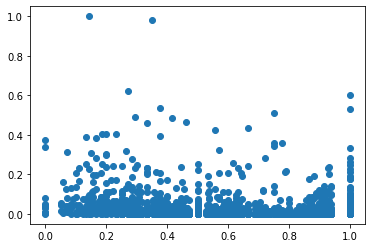

In [6]:
plt.scatter(X_scaled[:,0],X_scaled[:,1], label='True Position')

In [7]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_scaled)
    Sum_of_squared_distances.append(km.inertia_)

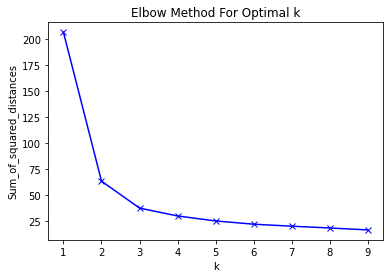

In [8]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [9]:
#Applying PCA on scaled dataset
pca = PCA(n_components=2).fit(X_scaled)
pca_2d = pca.transform(X_scaled)

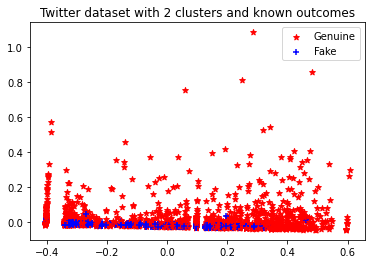

In [10]:
#Plotting original dataset based on lables after applying PCA
for i in range(0, pca_2d.shape[0]):
    if y[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='*')
    
    elif y[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
        
pl.legend([c1, c2], ['Genuine', 'Fake'])
pl.title('Twitter dataset with 2 clusters and known outcomes')
pl.show()

In [11]:
#Thus optimal value for k=2
km = KMeans(n_clusters=2)
km = km.fit(pca_2d)
pca_2d.shape

(2818, 2)

In [12]:
print(km.cluster_centers_)  

[[ 0.1754501  -0.00351231]
 [-0.28835702  0.00577258]]


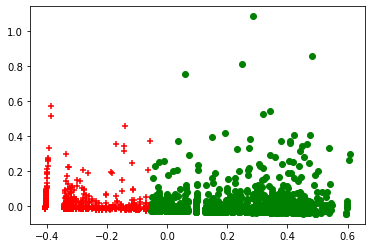

In [13]:
#Plotting the data into two clusters

for i in range(0, pca_2d.shape[0]):
    if km.labels_[i] == 1:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    
    elif km.labels_[i] == 0:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')

In [14]:
#Checking predicted labels againest actual labels
correct=0
for i in range(0, pca_2d.shape[0]):
    if km.labels_[i] == y[i]:
        correct+=1

print(correct/len(y))

0.485805535841022


In [15]:
conf_matrix = confusion_matrix(y, km.labels_)

In [16]:
#true_negative
TN = conf_matrix[0][0]
#false_negative
FN = conf_matrix[1][0]
#false_positive
FP = conf_matrix[0][1]
#true_positive
TP = conf_matrix[1][1]

In [17]:
# Recall is the ratio of the total number of correctly classified positive examples divided by the total number of positive examples. 
# High Recall indicates the class is correctly recognized (small number of FN)

recall = (TP)/(TP + FN)

In [18]:
# Precision is the the total number of correctly classified positive examples divided by the total number of predicted positive examples. 
# High Precision indicates an example labeled as positive is indeed positive (small number of FP)

precision = (TP)/(TP + FP)

In [19]:
fmeasure = (2*recall*precision)/(recall+precision)   #f-measure is the harmonice mean of Recall and Precision
accuracy = (TP + TN)/(TN + FN + FP + TP) #Total number of correct predictions divided by total number of instances predicted

accuracy_score(y, km.labels_)

0.485805535841022

In [20]:
print("------ CLASSIFICATION PERFORMANCE OF THE NAIVE BAYES MODEL ------ \n"\
      "\n Recall : ", (recall*100) ,"%" \
      "\n Precision : ", (precision*100) ,"%" \
      "\n Accuracy : ", (accuracy*100) ,"%" \
      "\n F-measure : ", (fmeasure*100) ,"%" )


------ CLASSIFICATION PERFORMANCE OF THE NAIVE BAYES MODEL ------ 

 Recall :  35.67688855646971 %
 Precision :  44.746716697936215 %
 Accuracy :  48.5805535841022 %
 F-measure :  39.70037453183521 %
